# Urdu

## EDA of Urdu Dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Concatenate, Dropout


2024-08-16 11:39:27.320733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 11:39:27.320852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 11:39:27.454170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
df=pd.read_excel("/kaggle/input/urduadataset/Lable_Urdu_Final_Dataset.xlsx")

In [9]:
df.isnull().sum()

comment      0
user_name    0
brand        0
gender       0
label        0
dtype: int64

In [10]:
df

,comment,user_name,brand,gender,label
0,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Muhammad Ahmed,Dell,Male,1
1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,Fatima Ali,HP,Female,1
2,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Ali Hassan,Lenovo,Male,1
3,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Aisha Khan,Apple,Female,1
4,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Usman Malik,Asus,Male,1
...,...,...,...,...,...
3772,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,dhairya agarwal,Apple,Male,2
3773,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,Gaso Meter,NEC,Male,2
3774,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Piyush Kumar Jha,Asus,Male,2
3775,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Salma,Samsung,Female,2


In [11]:
df = df.dropna(subset=["comment"]).replace(["NaN", ""], float("nan")).dropna(subset=["brand"])
df = df.dropna(subset=["gender"]).replace(["NaN", ""], float("nan")).dropna(subset=["gender"])
df = df.dropna(subset=["label"]).replace(["NaN", ""], float("nan")).dropna(subset=["label"])

df['gender'] = df['gender'].replace('male', 'Male')
df['gender'] = df['gender'].replace('fmale', 'Female')
df

,comment,user_name,brand,gender,label
0,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Muhammad Ahmed,Dell,Male,1
1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,Fatima Ali,HP,Female,1
2,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Ali Hassan,Lenovo,Male,1
3,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Aisha Khan,Apple,Female,1
4,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Usman Malik,Asus,Male,1
...,...,...,...,...,...
3772,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,dhairya agarwal,Apple,Male,2
3773,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,Gaso Meter,NEC,Male,2
3774,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Piyush Kumar Jha,Asus,Male,2
3775,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Salma,Samsung,Female,2


In [12]:
df.groupby("label").describe()

comment                                                                 \
        count unique                                                top freq   
label                                                                          
0        1259    849  گیٹ وے تخلیق کار لیپ ٹاپ چیسیس میں استحکام کی ...    5   
1        1259   1223        لینوو فلیکس 4 بہترین کاموں کے لئے مناسب ہے۔    3   
2        1259    788  کیا یہ Dell لیپ ٹاپ برانڈ کی ٹھرمل پرفارمنس اچ...    7   

      user_name                        brand                     gender  \
          count unique        top freq count unique     top freq  count   
label                                                                     
0          1259    475  Miss Zuha   43  1259     28  Lenovo  217   1259   
1          1259    844  Miss Zuha   12  1259     27  Lenovo  308   1259   
2          1259    757   Tanzeela    6  1259     40    Asus  253   1259   

                         
      unique   top freq  
label                    
0          2  Male  689  
1          2  Male  831  
2          2  Male  856

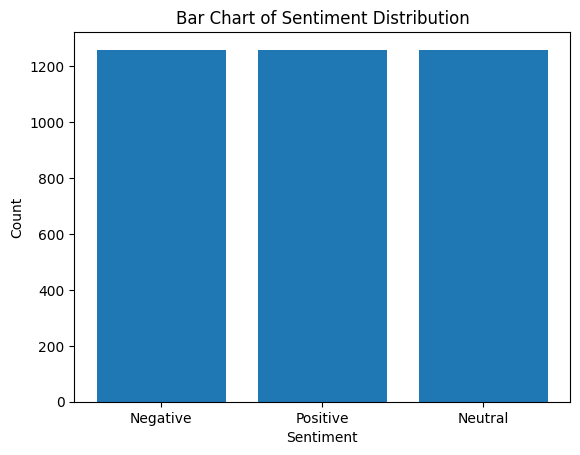

In [14]:
import matplotlib.pyplot as plt

label_0_data = df[df["label"] == 0]
label_1_data = df[df["label"] == 1]
label_2_data = df[df["label"] == 2]

label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)

labels = ['Negative', 'Positive', 'Neutral']
sizes = [label_0_size, label_1_size, label_2_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()


###Over-sampling (Up Sampling):
This technique is used to modify the unequal data classes to create balanced datasets. When the quantity of data is insufficient, the oversampling method tries to balance by incrementing the size of rare samples.

In [16]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
X_users = df['user_name'].values.reshape(-1, 1)
X_comments = df['comment'].values.reshape(-1, 1)
X_brands = df['brand'].values.reshape(-1, 1)
X_gender = df['gender'].values.reshape(-1, 1)
gender_encoder = LabelEncoder()
X_gender_encoded = gender_encoder.fit_transform(X_gender)

y = df['label']
class_counts = y.value_counts()
print("Class distribution before balancing:")
print(class_counts)
target_size = max(class_counts)
X_features = pd.concat([
    pd.DataFrame(X_users, columns=['user_name']),
    pd.DataFrame(X_comments, columns=['comment']),
    pd.DataFrame(X_brands, columns=['brand']),
    pd.DataFrame(X_gender_encoded, columns=['gender'])
], axis=1)

oversampler = RandomOverSampler(sampling_strategy={0: target_size, 1: target_size, 2: target_size})
X_balanced, y_balanced = oversampler.fit_resample(X_features, y)

balanced_class_counts = y_balanced.value_counts()
print("\nClass distribution after balancing:")
print(balanced_class_counts)

X_balanced['gender'] = gender_encoder.inverse_transform(X_balanced['gender'])

df = pd.concat([X_balanced, y_balanced], axis=1)


Class distribution before balancing:
label
1    1259
2    1259
0    1259
Name: count, dtype: int64

Class distribution after balancing:
label
1    1259
2    1259
0    1259
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
df

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1
...,...,...,...,...,...
3772,dhairya agarwal,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,Apple,Male,2
3773,Gaso Meter,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,NEC,Male,2
3774,Piyush Kumar Jha,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Asus,Male,2
3775,Salma,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Samsung,Female,2


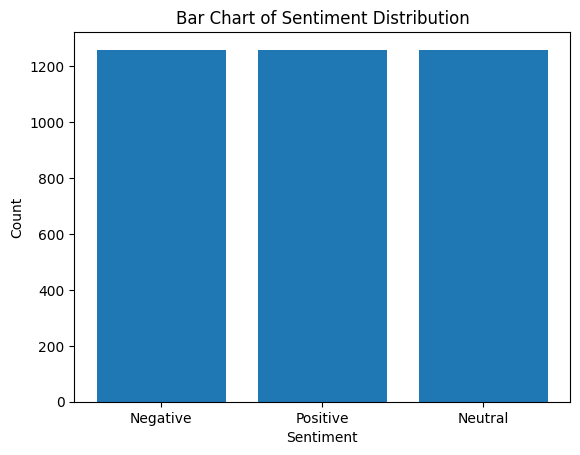

In [18]:
import matplotlib.pyplot as plt

label_0_data = df[df["label"] == 0]
label_1_data = df[df["label"] == 1]
label_2_data = df[df["label"] == 2]

label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)

labels = ['Negative', 'Positive', 'Neutral']
sizes = [label_0_size, label_1_size, label_2_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()



## Preprocess raw text for Sentiment analysis

**Preprocess raw text for Sentiment analysis**

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string

Lowercasing

Removing stop words and punctuation

Stemming

### Remove punctuations

In [19]:
pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import string
import re

def remove_punctuations(text):
    pattern = r'[^\w\s۰-۹آ-ی]'
    text = re.sub(pattern, '', text)
    return text
df['comment'] = df['comment'].apply(remove_punctuations)

In [22]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]|_+', '', text)
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'youtube\S+', '', cleaned_text)
    cleaned_text = re.sub(r'[(){}\[\]]', '', cleaned_text)
    cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
    return cleaned_text
df['comment'] = df['comment'].apply(clean_text)


In [23]:
import pandas as pd
import demoji
import re
demoji.download_codes()

def remove_emojis_and_urls(text):
    text_without_emojis = demoji.replace(text, '')
    text_without_urls = re.sub(r'http\S+', '', text_without_emojis)

    return text_without_urls
df['comment']= df['comment'].apply(remove_emojis_and_urls)


/tmp/ipykernel_34/2325055694.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [24]:
df.head()

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ا...,Dell,Male,1
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیںکی بورڈ ٹائپ کرنے میں...,Lenovo,Male,1
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیںڈیزائن...,Apple,Female,1
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوںوہ طاقتو...,Asus,Male,1


In [28]:
df['sentence_length'] = df['comment'].apply(len)

In [75]:
min_length = df['sentence_length'].min()
min_sentence = df[df['sentence_length'] == min_length]['comment'].iloc[0]

max_length = df['sentence_length'].max()
max_sentence = df[df['sentence_length'] == max_length]['comment'].iloc[0]

print(f"Minimum sentence length: {min_length}")
print(f"Sentence with minimum length: {min_sentence}\n")
print(f"Maximum sentence length: {max_length}")
print(f"Sentence with maximum length: {max_sentence}")


Minimum sentence length: 9
Sentence with minimum length: سیب یا HP

Maximum sentence length: 753
Sentence with maximum length: ابھی 3 ماہ قبل ایسر سوئفٹ 3 2020 خریدا تھامجھے یہ پسند ہے  اب تک یہ میری زندگی کی بہترین خریداری ہےاسے 60kbrbrspecs پر ملا برپروسیسر  AMD RYZEN 5 4500U 6 کور  23GHz بیس  40GHz ٹربو  انٹیل کے 10 ویں جنرل سے 15  زیادہ IPC BRRAM  8GB LPDDR4X 3200MHz سولڈرڈ برسٹریج  512GB PCIE3X4 NVME SSD ترتیب RW  18GBS 10GBS  بے ترتیب RW  800MBS 750MBS برگرافکس  AMD Radeon VEGA 6 4000 سیریز CPUBrkene  FHD 1920 میں مربوطآئی پی ایس پینل 57  ایس آر جی بی بربیٹری  عام کام پر 11 گھنٹے  درمیانی پر 9 گھنٹے  بہت ہی بھاری ٹاسبر ویٹ میں 75 گھنٹے  12 کلو گربڈی  مکمل دھات کے ال ایم جی مصر صرف بیزل میں پلاسٹک ہے برپورٹ سلیکشن  USB C 31gen2 USBA 31Gen1  USBA 20 HDMI 35 ملی میٹر آڈیو جیک برپائس 5999999999999999999999999999999999999999999999999 یہاں کے شاٹس کو یہاں دیکھ رہے ہیں


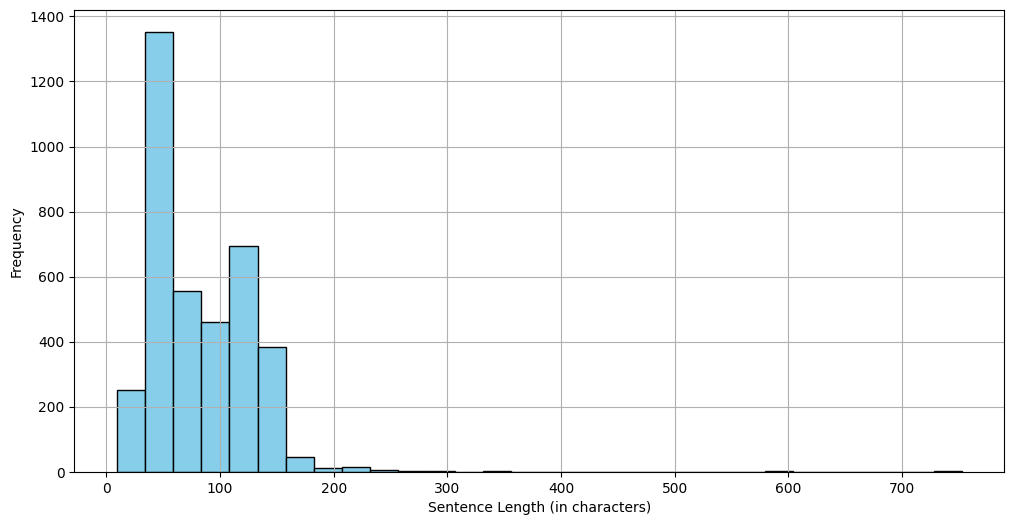

In [30]:
import matplotlib.pyplot as plt

# Plot histogram of sentence lengths
plt.figure(figsize=(12, 6))
plt.hist(df['sentence_length'], bins=30, color='skyblue', edgecolor='black')
# plt.title('Histogram of Sentence Lengths')
plt.xlabel('Sentence Length (in characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [114]:
# Encode the labels
df['comment'] = df['comment'].astype(str)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = 400
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional, Concatenate, GlobalMaxPooling1D

# Define the input layer
input_layer = Input(shape=(max_len,))

# Embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# CNN part
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)

# BiLSTM part
bilstm_layer = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

# Concatenate CNN and BiLSTM outputs
concat_layer = Concatenate()([pooling_layer, bilstm_layer]) 

# Add Dense layers
dense_layer = Dense(128, activation='relu')(concat_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output layer for multi-class classification
output_layer = Dense(3, activation='softmax')(dropout_layer)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 400, 128)  │    398,464 │ input_layer_9[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 396, 128)  │     82,048 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_8[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 256)       │    263,168 │ embedding_9[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ bidirectional_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │     49,280 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128)       │          0 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 3)         │        387 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 793,347 (3.03 MB)

 Trainable params: 793,347 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

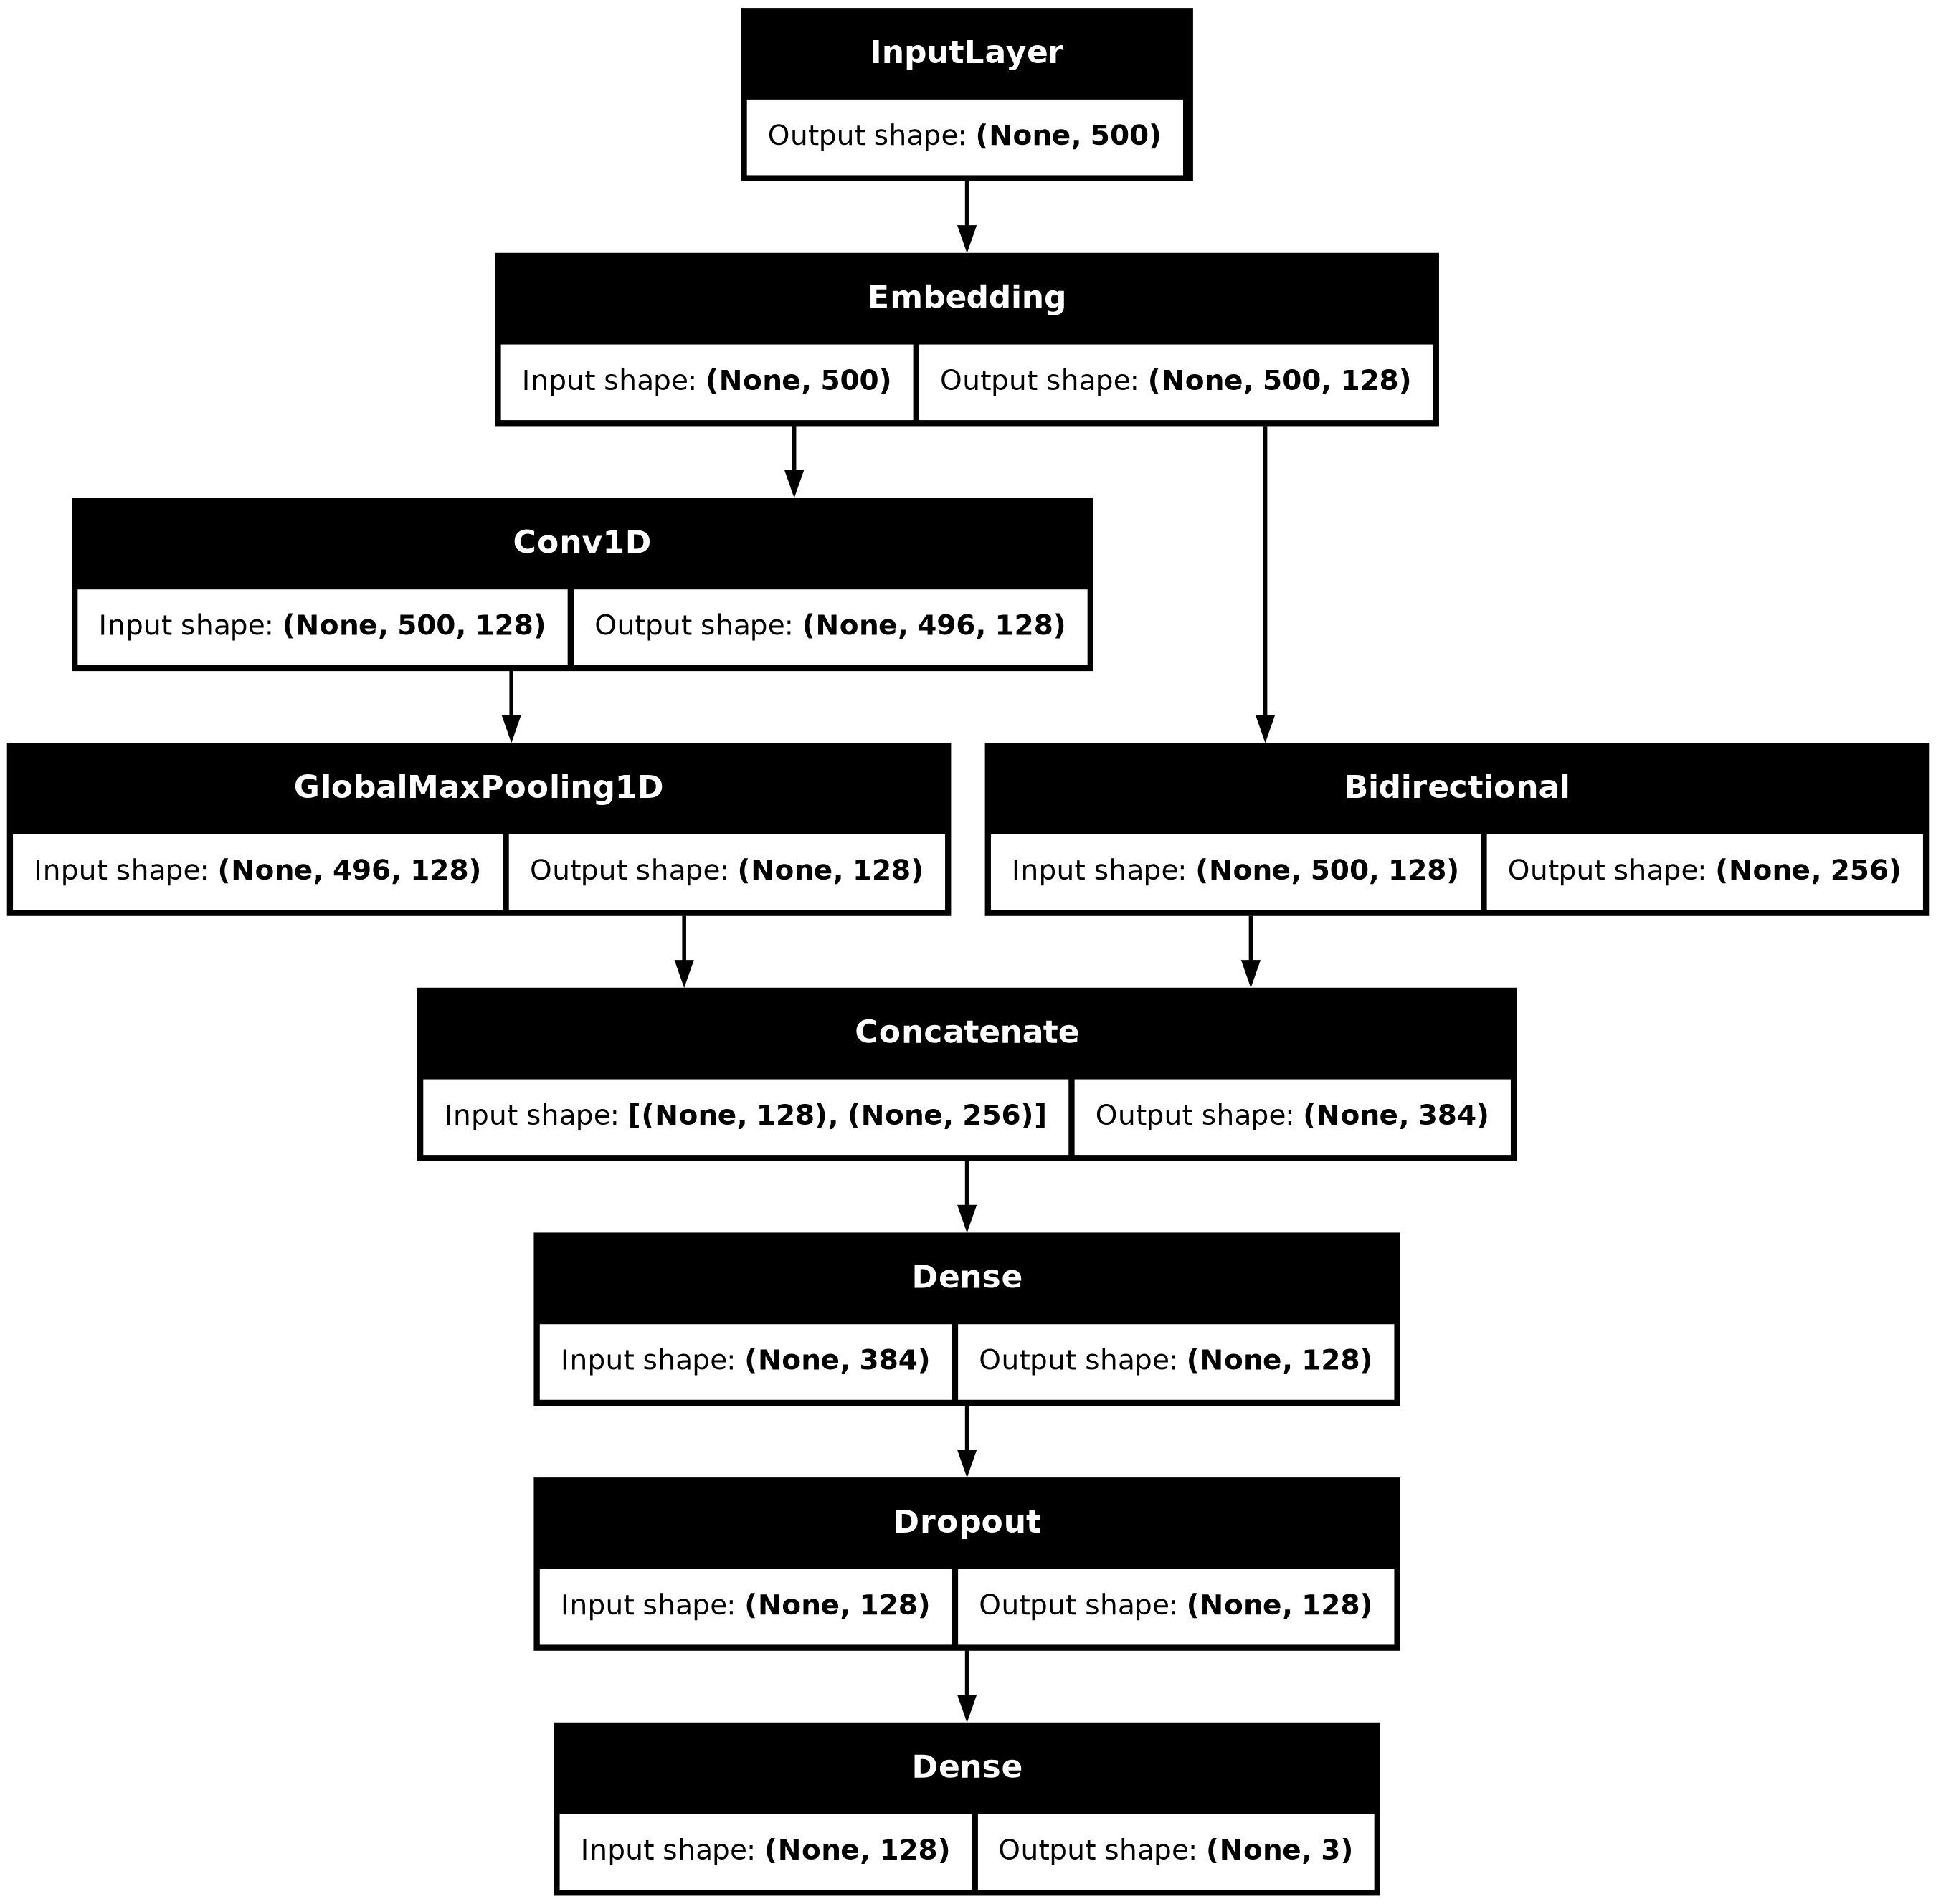

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [88]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.5567 - loss: 0.9183 - val_accuracy: 0.8995 - val_loss: 0.2845
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9255 - loss: 0.2311 - val_accuracy: 0.9272 - val_loss: 0.1902
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9777 - loss: 0.0829 - val_accuracy: 0.9220 - val_loss: 0.2155
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9920 - loss: 0.0315 - val_accuracy: 0.9339 - val_loss: 0.2361
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9904 - loss: 0.0377 - val_accuracy: 0.9405 - val_loss: 0.2328
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9986 - loss: 0.0105 - val_accuracy: 0.9378 - val_loss: 0.2334
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.9431 - val_loss: 0.2394
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9418 - v

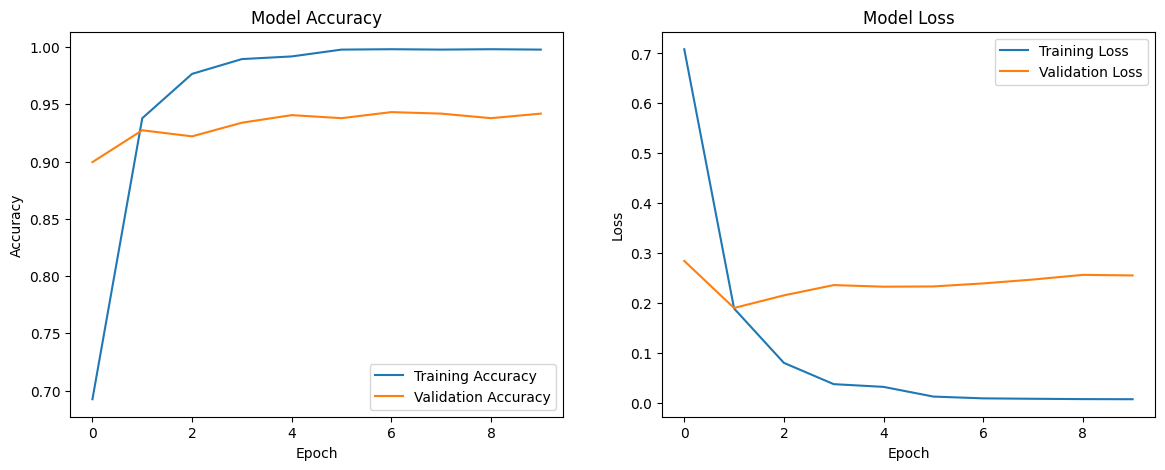

In [89]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9443 - loss: 0.2346
Test Accuracy: 94.18%


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

# Extract features from the CNN-BiLSTM model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('dense_19').output)
X_train_features = feature_extractor.predict(X_train_pad)
X_test_features = feature_extractor.predict(X_test_pad)

# Train a Logistic Regression model with increased iterations
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_features, y_train)

# Predict and evaluate the Logistic Regression model
y_pred = lr_model.predict(X_test_features)
target_names = [str(cls) for cls in label_encoder.classes_]

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       235
           1       0.95      0.91      0.93       279
           2       0.91      0.96      0.93       242

    accuracy                           0.94       756
   macro avg       0.94      0.94      0.94       756
weighted avg       0.94      0.94      0.94       756

